In [1]:
# Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2
from keras.models import load_model
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical

In [2]:
path = r'D:/Downloads/Datasets/Mask_NoMask'
cate = ['Mask','No_Mask'] 

In [3]:
# Reading images and resizing
image_size = 200
input_image = []
for i in cate: # value of i would be mask and then no mask
    folders = os.path.join(path ,i)
    label = cate.index(i) # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path) # using the cv2 i am reading the image and storing in variable image_array
        image_array =cv2.resize(image_array , (image_size , image_size) ) # resizing each image to 200 * 200
        input_image.append([image_array , label])

In [4]:
# Shuffling images to get sample
np.random.shuffle(input_image)
X = []
Y = []

In [5]:
# Separating independent and dependent variables
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [6]:
# Checking for labels
# 0 : No mask 
# 1 : Mask
np.unique(Y)

array([0, 1])

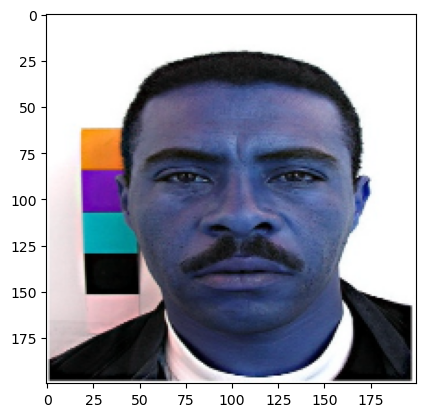

In [7]:
plt.imshow(X[0])

In [8]:
# Converting to array
X = np.array(X)
Y = np.array(Y)

In [9]:
# Normalization
X = X/255

In [10]:
# Creating a model
model = Sequential()

# first layer
model.add(Conv2D(filters = 40 , kernel_size =(3,3) ,activation ='relu',))
model.add(MaxPool2D(pool_size =(2,2)))
# second layer
model.add(Conv2D(filters = 80 , kernel_size =(3,3) ,activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
# Third layer
model.add(Conv2D(filters = 120 , kernel_size =(3,3) ,activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
# fourth layer
model.add(Conv2D(filters = 140 , kernel_size =(3,3) ,activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))

In [11]:
# Flattening the array
model.add(Flatten())
model.add(Dense(50 , activation = 'relu' , input_shape = X.shape[1:]))
# Deactivating 20% of neurons to avoid overfitting
model.add(Dropout(0.2))     # To overcome over fitting
# Output layer
model.add(Dense(2 , activation= 'softmax'))

In [12]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] ) # complie

In [13]:
model.fit(X , Y , epochs=5, validation_split= .15, batch_size = 32)

Epoch 1/5
206/206 [==============================] - 194s 931ms/step - loss: 0.4123 - accuracy: 0.7934 - val_loss: 0.2943 - val_accuracy: 0.8737
Epoch 2/5
206/206 [==============================] - 190s 923ms/step - loss: 0.2522 - accuracy: 0.8999 - val_loss: 0.2204 - val_accuracy: 0.9227
Epoch 3/5
206/206 [==============================] - 192s 932ms/step - loss: 0.2106 - accuracy: 0.9187 - val_loss: 0.2272 - val_accuracy: 0.9115
Epoch 4/5
206/206 [==============================] - 192s 930ms/step - loss: 0.1656 - accuracy: 0.9361 - val_loss: 0.1891 - val_accuracy: 0.9244
Epoch 5/5
206/206 [==============================] - 192s 935ms/step - loss: 0.1545 - accuracy: 0.9428 - val_loss: 0.1500 - val_accuracy: 0.9459


In [14]:
# Saving the model 
model.save("my_mask_NoMask_model.h5")

In [15]:
# Loading model again for further use
model=load_model("my_mask_NoMask_model.h5")

results={0:'Mask found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0)


haarcascade = cv2.CascadeClassifier(r"D:/Downloads/Datasets/Harcascade/haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1)


    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f]

        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)


        label=np.argmax(result,axis=1)[0]

        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera', im)
    key = cv2.waitKey(10)

    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 26ms/step
